In [1]:
#import the necessary modules 
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy
import sklearn
import itertools 
from itertools import cycle 
import os.path as op
import timeit 
import json
import math


In [2]:
import multiprocessing as m_proc
m_proc.cpu_count()

4

In [3]:
# Import MDAnalysis
import MDAnalysis as mda
import statsmodels as stats
from MDAnalysis.analysis import polymer, distances, rdf
import matplotlib.font_manager as font_manager

In [4]:
from polymer_MD_analysis import pers_length, get_rg_pers_poly, bavg_pers_cnt

## PLGA/acetone system analysis

### N = 6

In [5]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n6_plga_ace = mda.Universe("n6plga_ace/n6plgaonly_ace.pdb", "n6plga_ace/noace_n6plga.xtc")

In [6]:
n6_plga_ace.trajectory

<XTCReader n6plga_ace/noace_n6plga.xtc with 18001 frames of 93 atoms>

In [7]:
len(n6_plga_ace.trajectory)

18001

In [8]:
#Select the polymer heavy atoms 
plga_n6ace = n6_plga_ace.select_atoms("resname sPLG PLG tPLG and not type H")

In [9]:
crv_n6plga_ace = pers_length(plga_n6ace,6)
crv_n6plga_ace

array([[ 1.        ,  0.80418824,  0.78406901,  0.88975649,  0.84552509],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ],
       [ 0.        , 36.4680684 , 38.36534492, 27.15733702, 32.27176096]])

In [10]:
com_bond = np.zeros(shape=(1,18000))
count = 0
for ts in n6_plga_ace.trajectory[0:18000]:
    n6_mon1_ace = n6_plga_ace.select_atoms("resid 1")
    n6_mon2_ace = n6_plga_ace.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n6_mon1_ace.center_of_mass(), n6_mon2_ace.center_of_mass(), 
                                                   box=n6_plga_ace.trajectory.ts.dimensions)
    com_bond[0, count] = oo_len
    count += 1
    

In [11]:
com_bond

array([[6.09997491, 6.23139581, 6.17588698, ..., 6.11147967, 6.35360308,
        5.97739273]])

In [12]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

5.776390474751167

In [13]:
np.std(com_bond)

0.754655677316976

### Radius of Gyration vs. time N = 6 PLGA/acetone system

In [14]:
n6plga_rgens_ace, cor_n6plga_ace, N6plga_cos_ace, rgace_n6plga = get_rg_pers_poly(plga_n6ace, n6_plga_ace, 0, 18000)

In [15]:
n6plga_rgens_ace[0].shape

(18000,)

In [16]:
cor_n6plga_ace[3]

array([0., 1., 2., 3., 4.])

In [17]:
N6plga_cos_ace

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.80418824, 0.76674876, 0.77881425, ..., 0.71354447, 0.72123038,
        0.71194262],
       [0.78406901, 0.68253334, 0.6990683 , ..., 0.40634536, 0.40426327,
        0.46990348],
       [0.88975649, 0.80336439, 0.7596556 , ..., 0.12319902, 0.26602247,
        0.23823692],
       [0.84552509, 0.6760903 , 0.65165184, ..., 0.08778806, 0.21868856,
        0.13939959]])

In [18]:
rgace_n6plga

7.521699001337743

In [19]:
np.std(n6plga_rgens_ace)

1.311830503727833

In [20]:
trj_len = np.arange(18000)

#trj_len += 1
trj_len


array([    0,     1,     2, ..., 17997, 17998, 17999])

(0.2, 2)

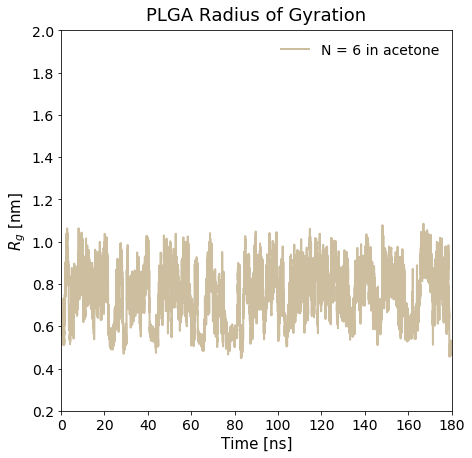

In [21]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6plga_rgens_ace[0]/10,linewidth=2, color='#CCBE9F')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 6 PLGA/acetone system

In [22]:
# x values
blen_ace = cor_n6plga_ace[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_ace

array([ 0.        ,  5.77639047, 11.55278095, 17.32917142, 23.1055619 ])

In [23]:
mk_n6p_ace = cor_n6plga_ace[1]/cor_n6plga_ace[0]
mk_n6p_ace

array([6.40453183e-17, 7.27798271e-02, 2.69756620e-01, 6.84521356e-01,
       1.36239423e+00])

<ErrorbarContainer object of 3 artists>

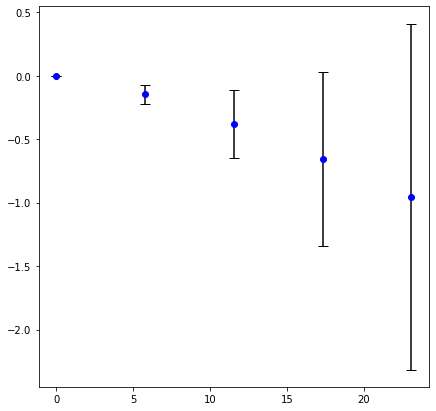

In [24]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ace, np.log(cor_n6plga_ace[0]), yerr=mk_n6p_ace, color='b', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [25]:
# All the points give the best fits for N = 6 peg in water
n6_blksplga_ace , n6plga_lpace = bavg_pers_cnt(5, plga_n6ace, n6_plga_ace, lb_avg_pn6, 3, 3000 , 18000)

3000
6000
Lp [Angstroms]: 36.375315685330406
Error in Lp from fit [Angstroms], 95% CL : 2.6334653567349466
R2 score: 0.9939700546471583
6000
9000
Lp [Angstroms]: 21.46186188740285
Error in Lp from fit [Angstroms], 95% CL : 4.605192554986109
R2 score: 0.9534388150244848
9000
12000
Lp [Angstroms]: 36.29490748747227
Error in Lp from fit [Angstroms], 95% CL : 4.237767605066813
R2 score: 0.9848944667067299
12000
15000
Lp [Angstroms]: 36.47369269837199
Error in Lp from fit [Angstroms], 95% CL : 4.2550579766834336
R2 score: 0.9849185844817137
15000
18000
Lp [Angstroms]: 34.10878259252371
Error in Lp from fit [Angstroms], 95% CL : 4.268448186597013
R2 score: 0.9827754581661247


In [26]:
n6_blksplga_ace

{'Avg Radius of gyration': array([7.57664606, 6.753936  , 7.83857943, 7.83258879, 7.65186473]),
 'Avg persistence length': array([36.37531569, 21.46186189, 36.29490749, 36.4736927 , 34.10878259])}

In [27]:
n6plga_lpace

array([[ 3.63753157e+01,  2.14618619e+01,  3.62949075e+01,
         3.64736927e+01,  3.41087826e+01],
       [ 2.63346536e+00,  4.60519255e+00,  4.23776761e+00,
         4.25505798e+00,  4.26844819e+00],
       [-2.74911703e-02, -4.65942799e-02, -2.75520746e-02,
        -2.74170210e-02, -2.93179622e-02],
       [ 1.07092705e-04,  2.70245057e-03,  2.79784244e-04,
         2.76581915e-04,  3.63920824e-04]])

In [28]:
n6plga_lpace[2]

array([-0.02749117, -0.04659428, -0.02755207, -0.02741702, -0.02931796])

In [29]:
np.mean(n6plga_lpace[3])

0.0007459660523214326

In [30]:
def line_fit(slope, x):
    return slope*x 

In [31]:
blen_ace

array([ 0.        ,  5.77639047, 11.55278095, 17.32917142, 23.1055619 ])

In [32]:
gg_n6plga_ace = line_fit(np.mean(n6plga_lpace[2]),blen_ace)

In [33]:
gg_n6plga_ace

array([-0.        , -0.18296429, -0.36592858, -0.54889287, -0.73185716])

### Block averaged Radius of gyration and persistence length, N = 6 PLGA/acetone system

In [34]:
np.mean(n6_blksplga_ace["Avg persistence length"])

32.942912070220245

In [35]:
np.std(n6_blksplga_ace["Avg persistence length"])

5.807881663284455

In [36]:
np.mean(n6_blksplga_ace["Avg Radius of gyration"])

7.530723002356703

In [37]:
np.std(n6_blksplga_ace["Avg Radius of gyration"])

0.40151732970650544

Text(0.5, -1.82, '$N_{PLGA}$ = 6: $L_{p}$ = 33.1 $\\AA$ ± 7.19 $\\AA$')

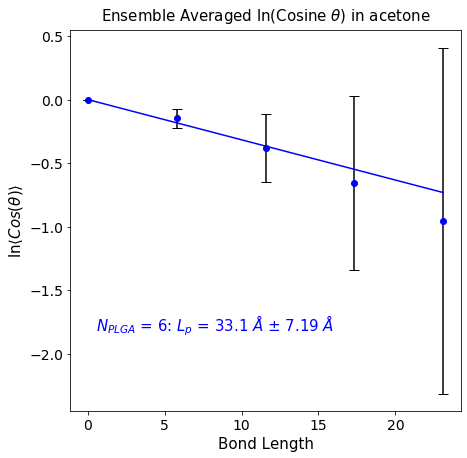

In [38]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ace, np.log(cor_n6plga_ace[0]), yerr=mk_n6p_ace, color='b', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_ace, gg_n6plga_ace, color='b')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in acetone', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
#plt.ylim(-1.9,0)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.tick_params(labelsize=14)
plt.text(0.5, -1.82,r'$N_{PLGA}$ = 6: $L_{p}$ = 32.9 $\AA$ ± 5.81 $\AA$', fontsize=15, color='b')
#plt.text(5,-0.15,r'R$^{2}$ = 0.98', fontsize=15, color='blue')

In [39]:
rgplga_olig_ace =  pd.DataFrame(data=n6_blksplga_ace["Avg Radius of gyration"]
                                  , columns=['$R_{g}$ [Angstrom] N = 6 PLGA in acetone'])
rgplga_olig_ace

,$R_{g}$ [Angstrom] N = 6 PLGA in acetone
0,7.576646
1,6.753936
2,7.838579
3,7.832589
4,7.651865


In [40]:
pers_plgat_ace = pd.DataFrame(data=n6_blksplga_ace["Avg persistence length"]
                                , columns=[r"$L_{p}$ [Angstrom] N = 6 PLGA in acetone"])
pers_plgat_ace

,$L_{p}$ [Angstrom] N = 6 PLGA in acetone
0,36.375316
1,21.461862
2,36.294907
3,36.473693
4,34.108783


### N = 8 PLGA/acetone system

In [41]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n8_plga_ace = mda.Universe("n8plga_ace/n8plgaonly_ace.pdb", "n8plga_ace/noace_n8plga.xtc")

In [42]:
n8_plga_ace.trajectory

<XTCReader n8plga_ace/noace_n8plga.xtc with 18001 frames of 123 atoms>

In [43]:
len(n8_plga_ace.trajectory)

18001

In [44]:
#Select the polymer heavy atoms 
plga_n8ace = n8_plga_ace.select_atoms("resname sPLG PLG tPLG and not type H")

In [45]:
crv_n8plga_ace = pers_length(plga_n8ace,8)
crv_n8plga_ace

array([[ 1.        ,  0.91533462,  0.86862647,  0.82201238,  0.79335317,
         0.77483914,  0.85529544],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ],
       [ 0.        , 23.74670735, 29.70058323, 34.71324869, 37.50001586,
        39.2095495 , 31.20761096]])

In [46]:
com_bond_n8ace = np.zeros(shape=(1,18000))
count = 0
for ts in n8_plga_ace.trajectory[0:18000]:
    n8_mon1_ace = n8_plga_ace.select_atoms("resid 1")
    n8_mon2_ace = n8_plga_ace.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n8_mon1_ace.center_of_mass(), n8_mon2_ace.center_of_mass(), 
                                                   box=n8_plga_ace.trajectory.ts.dimensions)
    com_bond_n8ace[0, count] = oo_len
    count += 1
    

In [47]:
com_bond

array([[6.09997491, 6.23139581, 6.17588698, ..., 6.11147967, 6.35360308,
        5.97739273]])

In [48]:
np.std(com_bond)

0.754655677316976

In [49]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

5.776390474751167

In [50]:
np.mean(com_bond_n8ace)

5.8013055204093025

In [51]:
np.std(com_bond_n8ace)

0.7411103926303159

### Radius of Gyration vs. time N = 8 PLGA/acetone system

In [52]:
n8plga_rgens_ace, cor_n8plga_ace, N8plga_cos_ace, rgace_n8plga = get_rg_pers_poly(plga_n8ace, n8_plga_ace, 0, 18000)

In [53]:
n8plga_rgens_ace[0].shape

(18000,)

In [54]:
cor_n8plga_ace[3]

array([0., 1., 2., 3., 4., 5., 6.])

In [55]:
N8plga_cos_ace

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.91533462,  0.89514253,  0.93794269, ...,  0.84788652,
         0.837037  ,  0.84205115],
       [ 0.86862647,  0.9043932 ,  0.91026489, ...,  0.48417805,
         0.40528479,  0.44004286],
       ...,
       [ 0.79335317,  0.90740038,  0.95857886, ..., -0.05480755,
         0.01914008,  0.05736382],
       [ 0.77483914,  0.86456351,  0.95982635, ..., -0.01413199,
        -0.01920024,  0.03051864],
       [ 0.85529544,  0.90391547,  0.9393509 , ...,  0.6995028 ,
         0.56458189,  0.4548699 ]])

In [57]:
rgace_n8plga

8.86797417625803

In [58]:
np.std(n8plga_rgens_ace)

1.8582385650355728

(0.2, 2)

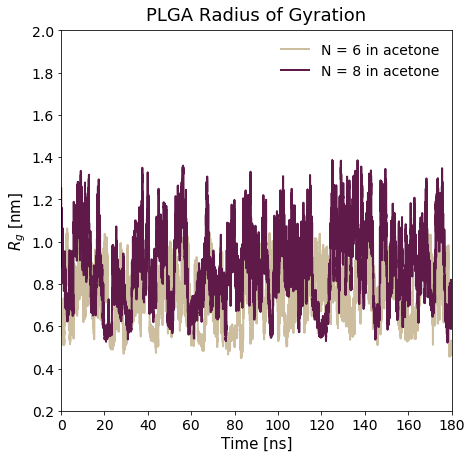

In [59]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6plga_rgens_ace[0]/10,linewidth=2, color='#CCBE9F')
plt.plot(trj_len/100, n8plga_rgens_ace[0]/10,linewidth=2, color='#601A4A')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone','N = 8 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 8 PLGA/acetone system

In [60]:
# x values
blen_n8ace = cor_n8plga_ace[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_n8ace

array([ 0.        ,  5.77639047, 11.55278095, 17.32917142, 23.1055619 ,
       28.88195237, 34.65834285])

In [61]:
mk_n8p_ace = cor_n8plga_ace[1]/cor_n8plga_ace[0]
mk_n8p_ace

array([4.03957800e-17, 5.89120721e-02, 2.05254789e-01, 4.40238751e-01,
       7.24410665e-01, 1.16163505e+00, 1.65452212e+00])

<ErrorbarContainer object of 3 artists>

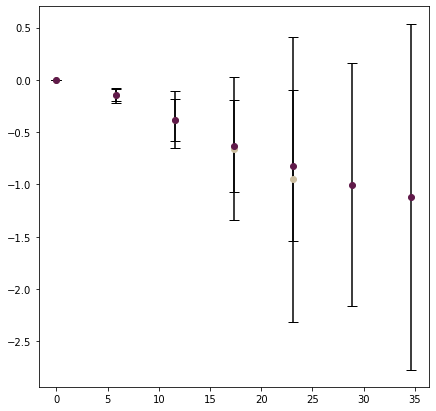

In [62]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ace, np.log(cor_n6plga_ace[0]), yerr=mk_n6p_ace, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8ace, np.log(cor_n8plga_ace[0]), yerr=mk_n8p_ace, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [63]:
# All the points give the best fits for N = 6 peg in water
n8_blksplga_ace , n8plga_lpace = bavg_pers_cnt(5, plga_n8ace, n8_plga_ace, lb_avg_pn6, 4, 3000 , 18000)

3000
6000
Lp [Angstroms]: 29.631152523869194
Error in Lp from fit [Angstroms], 95% CL : 2.0362300820700194
R2 score: 0.9854935702028589
6000
9000
Lp [Angstroms]: 27.133883065538267
Error in Lp from fit [Angstroms], 95% CL : 1.8352007701279733
R2 score: 0.9859410710656457
9000
12000
Lp [Angstroms]: 29.235818083886432
Error in Lp from fit [Angstroms], 95% CL : 1.6210160750121827
R2 score: 0.9903400335102923
12000
15000
Lp [Angstroms]: 38.30586483308147
Error in Lp from fit [Angstroms], 95% CL : 1.8515989060262972
R2 score: 0.992564709991156
15000
18000
Lp [Angstroms]: 25.473421467537825
Error in Lp from fit [Angstroms], 95% CL : 2.988631827364019
R2 score: 0.9612151196259052


In [64]:
n8_blksplga_ace

{'Avg Radius of gyration': array([8.90711297, 8.57625708, 8.80431312, 9.65388541, 8.75776826]),
 'Avg persistence length': array([29.63115252, 27.13388307, 29.23581808, 38.30586483, 25.47342147])}

In [65]:
n8plga_lpace

array([[ 2.96311525e+01,  2.71338831e+01,  2.92358181e+01,
         3.83058648e+01,  2.54734215e+01],
       [ 2.03623008e+00,  1.83520077e+00,  1.62101608e+00,
         1.85159891e+00,  2.98863183e+00],
       [-3.37482654e-02, -3.68542902e-02, -3.42046184e-02,
        -2.61056630e-02, -3.92566033e-02],
       [ 7.75226297e-04,  8.95546917e-04,  5.18421034e-04,
         2.29510055e-04,  3.05748745e-03]])

In [66]:
n8plga_lpace[2]

array([-0.03374827, -0.03685429, -0.03420462, -0.02610566, -0.0392566 ])

In [67]:
np.mean(n8plga_lpace[3])

0.0010952383508581662

In [68]:
blen_n8ace

array([ 0.        ,  5.77639047, 11.55278095, 17.32917142, 23.1055619 ,
       28.88195237, 34.65834285])

In [69]:
gg_n8plga_ace = line_fit(np.mean(n8plga_lpace[2]),blen_n8ace)

In [70]:
gg_n6plga_n8ace = line_fit(np.mean(n6plga_lpace[2]),blen_n8ace)

In [71]:
gg_n8plga_ace

array([-0.        , -0.19659303, -0.39318605, -0.58977908, -0.78637211,
       -0.98296513, -1.17955816])

### Block averaged Radius of gyration and persistence length, N = 8 PLGA/acetone system

In [72]:
np.mean(n8_blksplga_ace["Avg persistence length"])

29.956027994782637

In [73]:
np.std(n8_blksplga_ace["Avg persistence length"])

4.436266107737995

In [74]:
np.mean(n8_blksplga_ace["Avg Radius of gyration"])

8.939867368904865

In [75]:
np.std(n8_blksplga_ace["Avg Radius of gyration"])

0.3727310276797623

Text(0.5, -6.54, '$N_{PLGA}$ = 8: $L_{p}$ = 30.0 $\\AA$ ± 4.44 $\\AA$')

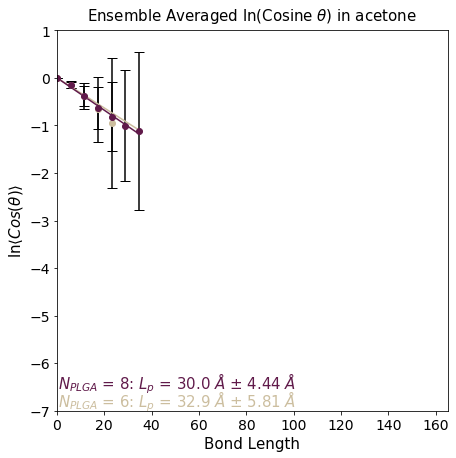

In [118]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ace, np.log(cor_n6plga_ace[0]), yerr=mk_n6p_ace, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8ace, np.log(cor_n8plga_ace[0]), yerr=mk_n8p_ace, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n8ace, gg_n6plga_n8ace, color='#CCBE9F')
plt.plot(blen_n8ace, gg_n8plga_ace, color='#601A4A')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in acetone', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-7,1)
plt.xlim(0,165)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
#plt.legend([r'$N_{PEG}$ = 6: $L_{p}$ = 10.7 $\AA$ ± 1.62 $\AA$'], loc=3, frameon=0, fontsize=14, prop=font)
plt.tick_params(labelsize=14)
plt.text(0.5, -6.92,r'$N_{PLGA}$ = 6: $L_{p}$ = 32.9 $\AA$ ± 5.81 $\AA$', fontsize=15, color='#CCBE9F')
plt.text(0.5, -6.54,r'$N_{PLGA}$ = 8: $L_{p}$ = 30.0 $\AA$ ± 4.44 $\AA$', fontsize=15, color='#601A4A')

In [77]:
rgplga_olig_ace[r"$R_{g}$ [Angstrom] N = 8 PLGA in acetone"] = n8_blksplga_ace["Avg Radius of gyration"]
rgplga_olig_ace

,$R_{g}$ [Angstrom] N = 6 PLGA in acetone,$R_{g}$ [Angstrom] N = 8 PLGA in acetone
0,7.576646,8.907113
1,6.753936,8.576257
2,7.838579,8.804313
3,7.832589,9.653885
4,7.651865,8.757768


In [78]:
pers_plgat_ace[r"$L_{p}$ [Angstrom] N = 8 PLGA in acetone"] = n8_blksplga_ace["Avg persistence length"]
pers_plgat_ace

,$L_{p}$ [Angstrom] N = 6 PLGA in acetone,$L_{p}$ [Angstrom] N = 8 PLGA in acetone
0,36.375316,29.631153
1,21.461862,27.133883
2,36.294907,29.235818
3,36.473693,38.305865
4,34.108783,25.473421


### N = 10 PLGA/acetone system

In [79]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n10_plga_ace = mda.Universe("n10plga_ace/n10plgaonly_ace.pdb", "n10plga_ace/noace_n10plga.xtc")

In [80]:
n10_plga_ace.trajectory

<XTCReader n10plga_ace/noace_n10plga.xtc with 18001 frames of 153 atoms>

In [81]:
len(n10_plga_ace.trajectory)

18001

In [82]:
#Select the polymer heavy atoms 
plga_n10ace = n10_plga_ace.select_atoms("resname sPLG PLG tPLG and not type H")

In [83]:
crv_n10plga_ace = pers_length(plga_n10ace,10)
crv_n10plga_ace

array([[ 1.        ,  0.91743975,  0.88364145,  0.79619723,  0.77575572,
         0.67287339,  0.70815492,  0.59253441,  0.77960547],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ,  7.        ,  8.        ],
       [ 0.        , 23.44538506, 27.91520164, 37.2315163 , 39.12640103,
        47.71077649, 44.91500758, 53.66293554, 38.77553342]])

In [84]:
com_bond_n10ace = np.zeros(shape=(1,18000))
count = 0
for ts in n10_plga_ace.trajectory[0:18000]:
    n10_mon1_ace = n10_plga_ace.select_atoms("resid 1")
    n10_mon2_ace = n10_plga_ace.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n10_mon1_ace.center_of_mass(), n10_mon2_ace.center_of_mass(), 
                                                   box=n10_plga_ace.trajectory.ts.dimensions)
    com_bond_n10ace[0, count] = oo_len
    count += 1
    

In [85]:
com_bond

array([[6.09997491, 6.23139581, 6.17588698, ..., 6.11147967, 6.35360308,
        5.97739273]])

In [86]:
np.std(com_bond)

0.754655677316976

In [87]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

5.776390474751167

In [88]:
np.mean(com_bond_n10ace)

5.786794440728252

In [89]:
np.std(com_bond_n10ace)

0.7612660098703158

### Radius of Gyration vs. time N = 10 PLGA/acetone system

In [90]:
n10plga_rgens_ace, cor_n10plga_ace, N10plga_cos_ace, rgace_n10plga = get_rg_pers_poly(plga_n10ace, n10_plga_ace, 0, 18000)

In [91]:
n10plga_rgens_ace[0].shape

(18000,)

In [92]:
cor_n10plga_ace[3]

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

In [93]:
N10plga_cos_ace

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.91743975,  0.92130526,  0.91679038, ...,  0.85780558,
         0.83092857,  0.8599365 ],
       [ 0.88364145,  0.88813043,  0.87675162, ...,  0.67233315,
         0.66591842,  0.68202012],
       ...,
       [ 0.70815492,  0.58477578,  0.73748024, ..., -0.40883596,
        -0.29379971, -0.43409896],
       [ 0.59253441,  0.54314792,  0.61426454, ..., -0.65784699,
        -0.56431976, -0.69681353],
       [ 0.77960547,  0.76025715,  0.89500522, ..., -0.71280749,
        -0.7064277 , -0.65191656]])

In [94]:
rgace_n10plga

9.420472217951767

In [95]:
np.std(n10plga_rgens_ace)

2.3374333398639546

(0.2, 2)

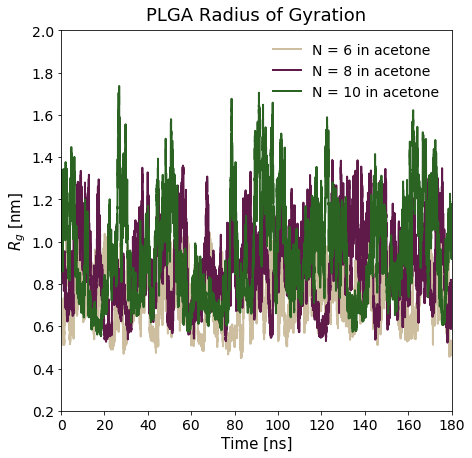

In [96]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6plga_rgens_ace[0]/10,linewidth=2, color='#CCBE9F')
plt.plot(trj_len/100, n8plga_rgens_ace[0]/10,linewidth=2, color='#601A4A')
plt.plot(trj_len/100, n10plga_rgens_ace[0]/10,linewidth=2, color='#2B6322')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone','N = 8 in acetone','N = 10 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 10 PLGA/acetone system

In [97]:
# x values
blen_n10ace = cor_n10plga_ace[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_n10ace

array([ 0.        ,  5.77639047, 11.55278095, 17.32917142, 23.1055619 ,
       28.88195237, 34.65834285, 40.43473332, 46.2111238 ])

In [98]:
mk_n10p_ace = cor_n10plga_ace[1]/cor_n10plga_ace[0]
mk_n10p_ace

array([4.39750481e-17, 5.56115783e-02, 2.07328014e-01, 4.53523590e-01,
       7.15964183e-01, 9.36996338e-01, 1.32196902e+00, 1.94475698e+00,
       2.79400125e+00])

<ErrorbarContainer object of 3 artists>

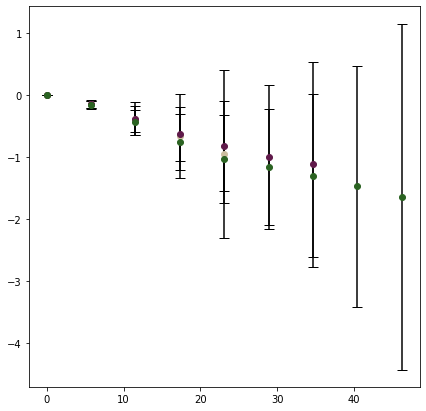

In [99]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ace, np.log(cor_n6plga_ace[0]), yerr=mk_n6p_ace, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8ace, np.log(cor_n8plga_ace[0]), yerr=mk_n8p_ace, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10ace, np.log(cor_n10plga_ace[0]), yerr=mk_n10p_ace, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [100]:
# All the points give the best fits for N = 6 peg in water
n10_blksplga_ace , n10plga_lpace = bavg_pers_cnt(5, plga_n10ace, n10_plga_ace, lb_avg_pn6, 4, 3000 , 18000)

3000
6000
Lp [Angstroms]: 22.968325203778594
Error in Lp from fit [Angstroms], 95% CL : 1.3831912360473717
R2 score: 0.9719819096460731
6000
9000
Lp [Angstroms]: 19.8035885386157
Error in Lp from fit [Angstroms], 95% CL : 1.448694433919234
R2 score: 0.96020516268547
9000
12000
Lp [Angstroms]: 30.972716254999316
Error in Lp from fit [Angstroms], 95% CL : 1.5715850666164173
R2 score: 0.9795148347191069
12000
15000
Lp [Angstroms]: 20.112041429318225
Error in Lp from fit [Angstroms], 95% CL : 1.5337989941879846
R2 score: 0.9571553194849488
15000
18000
Lp [Angstroms]: 30.53722036081892
Error in Lp from fit [Angstroms], 95% CL : 1.2875920526177496
R2 score: 0.9855116784289771


In [101]:
n10_blksplga_ace

{'Avg Radius of gyration': array([ 9.10474178,  8.12797917, 10.58254798,  9.36008483, 10.12716742]),
 'Avg persistence length': array([22.9683252 , 19.80358854, 30.97271625, 20.11204143, 30.53722036])}

In [102]:
n10plga_lpace

array([[ 2.29683252e+01,  1.98035885e+01,  3.09727163e+01,
         2.01120414e+01,  3.05372204e+01],
       [ 1.38319124e+00,  1.44869443e+00,  1.57158507e+00,
         1.53379899e+00,  1.28759205e+00],
       [-4.35382202e-02, -5.04958987e-02, -3.22864805e-02,
        -4.97214568e-02, -3.27469229e-02],
       [ 2.63287973e-03,  5.22590949e-03,  1.02788017e-03,
         5.50676008e-03,  7.30167403e-04]])

In [103]:
n10plga_lpace[2]

array([-0.04353822, -0.0504959 , -0.03228648, -0.04972146, -0.03274692])

In [104]:
np.mean(n10plga_lpace[3])

0.0030247193751553234

In [105]:
blen_n10ace

array([ 0.        ,  5.77639047, 11.55278095, 17.32917142, 23.1055619 ,
       28.88195237, 34.65834285, 40.43473332, 46.2111238 ])

In [106]:
gg_n10plga_ace = line_fit(np.mean(n10plga_lpace[2]),blen_n10ace)

In [107]:
gg_n6plga_n10ace = line_fit(np.mean(n6plga_lpace[2]),blen_n10ace)

In [108]:
gg_n8plga_n10ace = line_fit(np.mean(n8plga_lpace[2]),blen_n10ace)

In [109]:
gg_n10plga_ace

array([-0.        , -0.24120933, -0.48241867, -0.723628  , -0.96483734,
       -1.20604667, -1.447256  , -1.68846534, -1.92967467])

### Block averaged Radius of gyration and persistence length, N = 10 PLGA/acetone system

In [110]:
np.mean(n10_blksplga_ace["Avg persistence length"])

24.87877835750615

In [111]:
np.std(n10_blksplga_ace["Avg persistence length"])

4.925103225238329

In [112]:
np.mean(n10_blksplga_ace["Avg Radius of gyration"])

9.460504236648068

In [113]:
np.std(n10_blksplga_ace["Avg Radius of gyration"])

0.8503759149644537

Text(0.5, -6.14, '$N_{PLGA}$ = 10: $L_{p}$ = 24.9 $\\AA$ ± 4.93 $\\AA$')

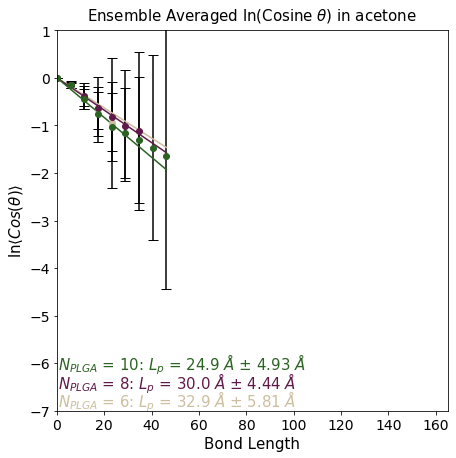

In [117]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ace, np.log(cor_n6plga_ace[0]), yerr=mk_n6p_ace, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8ace, np.log(cor_n8plga_ace[0]), yerr=mk_n8p_ace, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10ace, np.log(cor_n10plga_ace[0]), yerr=mk_n10p_ace, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n10ace, gg_n6plga_n10ace, color='#CCBE9F')
plt.plot(blen_n10ace, gg_n8plga_n10ace, color='#601A4A')
plt.plot(blen_n10ace, gg_n10plga_ace, color='#2B6322')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in acetone', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-7,1)
plt.xlim(0,165)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
#plt.legend([r'$N_{PEG}$ = 6: $L_{p}$ = 10.7 $\AA$ ± 1.62 $\AA$'], loc=3, frameon=0, fontsize=14, prop=font)
plt.tick_params(labelsize=14)
plt.text(0.5, -6.92,r'$N_{PLGA}$ = 6: $L_{p}$ = 32.9 $\AA$ ± 5.81 $\AA$', fontsize=15, color='#CCBE9F')
plt.text(0.5, -6.54,r'$N_{PLGA}$ = 8: $L_{p}$ = 30.0 $\AA$ ± 4.44 $\AA$', fontsize=15, color='#601A4A')
plt.text(0.5, -6.14,r'$N_{PLGA}$ = 10: $L_{p}$ = 24.9 $\AA$ ± 4.93 $\AA$', fontsize=15, color='#2B6322')

In [115]:
rgplga_olig_ace[r"$R_{g}$ [Angstrom] N = 10 PLGA in acetone"] = n10_blksplga_ace["Avg Radius of gyration"]
rgplga_olig_ace

,$R_{g}$ [Angstrom] N = 6 PLGA in acetone,$R_{g}$ [Angstrom] N = 8 PLGA in acetone,$R_{g}$ [Angstrom] N = 10 PLGA in acetone
0,7.576646,8.907113,9.104742
1,6.753936,8.576257,8.127979
2,7.838579,8.804313,10.582548
3,7.832589,9.653885,9.360085
4,7.651865,8.757768,10.127167


In [116]:
pers_plgat_ace[r"$L_{p}$ [Angstrom] N = 10 PLGA in acetone"] = n10_blksplga_ace["Avg persistence length"]
pers_plgat_ace

,$L_{p}$ [Angstrom] N = 6 PLGA in acetone,$L_{p}$ [Angstrom] N = 8 PLGA in acetone,$L_{p}$ [Angstrom] N = 10 PLGA in acetone
0,36.375316,29.631153,22.968325
1,21.461862,27.133883,19.803589
2,36.294907,29.235818,30.972716
3,36.473693,38.305865,20.112041
4,34.108783,25.473421,30.537220


### N = 20 PLGA/acetone system

In [119]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n20_plga_ace = mda.Universe("n20plga_ace/n20plgaonly_ace.pdb", "n20plga_ace/noace_n20plga.xtc")

In [120]:
n20_plga_ace.trajectory

<XTCReader n20plga_ace/noace_n20plga.xtc with 18001 frames of 303 atoms>

In [121]:
len(n20_plga_ace.trajectory)

18001

In [122]:
#Select the polymer heavy atoms 
plga_n20ace = n20_plga_ace.select_atoms("resname sPLG PLG tPLG and not type H")

In [123]:
crv_n20plga_ace = pers_length(plga_n20ace,20)
crv_n20plga_ace

array([[ 1.        ,  0.86699995,  0.72733863,  0.61573443,  0.64627067,
         0.64222015,  0.63261444,  0.63328864,  0.68520262,  0.68992712,
         0.68670519,  0.64656738,  0.59216615,  0.59448875,  0.77399722,
         0.748629  ,  0.7938646 ,  0.76235685,  0.93447467],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ,  7.        ,  8.        ,  9.        ,
        10.        , 11.        , 12.        , 13.        , 14.        ,
        15.        , 16.        , 17.        , 18.        ],
       [ 0.        , 29.88813649, 43.33625618, 51.99469498, 49.73898739,
        50.04242993, 50.75672407, 50.70682862, 46.74845547, 46.37566002,
        46.63014139, 49.71670605, 53.68912421, 53.52380533, 39.2857946 ,
        41.5282435 , 37.45185449, 40.3275842 , 20.85656136]])

In [124]:
com_bond_n20ace = np.zeros(shape=(1,18000))
count = 0
for ts in n20_plga_ace.trajectory[0:18000]:
    n20_mon1_ace = n20_plga_ace.select_atoms("resid 1")
    n20_mon2_ace = n20_plga_ace.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n20_mon1_ace.center_of_mass(), n20_mon2_ace.center_of_mass(), 
                                                   box=n20_plga_ace.trajectory.ts.dimensions)
    com_bond_n20ace[0, count] = oo_len
    count += 1
    

In [125]:
com_bond

array([[6.09997491, 6.23139581, 6.17588698, ..., 6.11147967, 6.35360308,
        5.97739273]])

In [126]:
np.std(com_bond)

0.754655677316976

In [127]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

5.776390474751167

In [128]:
np.mean(com_bond_n20ace)

5.724701823899055

In [129]:
np.std(com_bond_n20ace)

0.8248810639877253

### Radius of Gyration vs. time N = 20 PLGA/acetone system

In [131]:
n20plga_rgens_ace, cor_n20plga_ace, N20plga_cos_ace, rgace_n20plga = get_rg_pers_poly(plga_n20ace, n20_plga_ace, 0, 18000)

In [132]:
n20plga_rgens_ace[0].shape

(18000,)

In [133]:
cor_n20plga_ace[3]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18.])

In [134]:
N20plga_cos_ace

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.86699995, 0.88566693, 0.89532973, ..., 0.87915399, 0.86626717,
        0.86964999],
       [0.72733863, 0.74957531, 0.75460655, ..., 0.7385148 , 0.72126072,
        0.74327464],
       ...,
       [0.7938646 , 0.70333613, 0.75069279, ..., 0.84343316, 0.83158171,
        0.84738958],
       [0.76235685, 0.62741591, 0.69251645, ..., 0.8317201 , 0.82525083,
        0.83739762],
       [0.93447467, 0.59928183, 0.85830385, ..., 0.69234705, 0.77133442,
        0.78710392]])

In [135]:
rgace_n20plga

12.38005722655252

In [136]:
np.std(n20plga_rgens_ace)

3.3862477955576056

(0.2, 2)

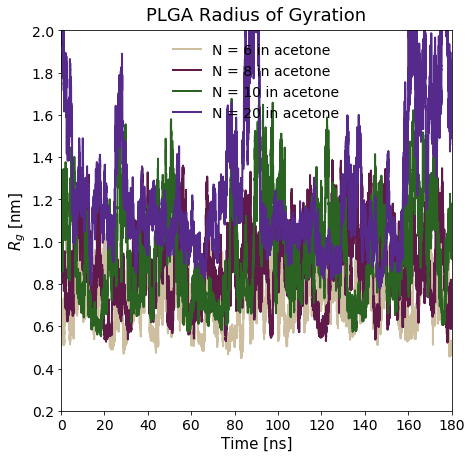

In [137]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6plga_rgens_ace[0]/10,linewidth=2, color='#CCBE9F')
plt.plot(trj_len/100, n8plga_rgens_ace[0]/10,linewidth=2, color='#601A4A')
plt.plot(trj_len/100, n10plga_rgens_ace[0]/10,linewidth=2, color='#2B6322')
plt.plot(trj_len/100, n20plga_rgens_ace[0]/10,linewidth=2, color='#562A8B')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone','N = 8 in acetone','N = 10 in acetone','N = 20 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 20 PLGA/acetone system

In [138]:
# x values
blen_n20ace = cor_n20plga_ace[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_n20ace

array([  0.        ,   5.77639047,  11.55278095,  17.32917142,
        23.1055619 ,  28.88195237,  34.65834285,  40.43473332,
        46.2111238 ,  51.98751427,  57.76390475,  63.54029522,
        69.3166857 ,  75.09307617,  80.86946665,  86.64585712,
        92.4222476 ,  98.19863807, 103.97502855])

In [139]:
mk_n20p_ace = cor_n20plga_ace[1]/cor_n20plga_ace[0]
mk_n20p_ace

array([2.35804447e-17, 3.27305990e-02, 1.00277175e-01, 2.09276455e-01,
       3.49772875e-01, 4.40963513e-01, 6.03385102e-01, 7.32402838e-01,
       8.78591251e-01, 1.06506189e+00, 1.05365033e+00, 1.13478963e+00,
       1.25977484e+00, 1.47325477e+00, 1.47886948e+00, 1.50355922e+00,
       1.82917968e+00, 1.85032828e+00, 1.89266085e+00])

<ErrorbarContainer object of 3 artists>

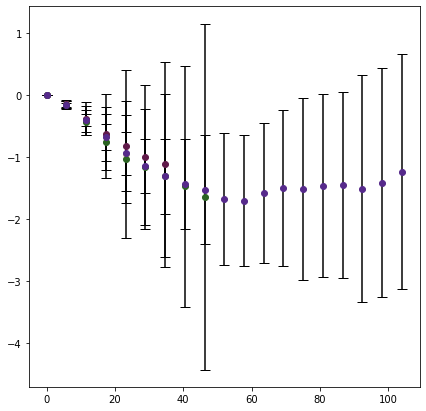

In [140]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ace, np.log(cor_n6plga_ace[0]), yerr=mk_n6p_ace, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8ace, np.log(cor_n8plga_ace[0]), yerr=mk_n8p_ace, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10ace, np.log(cor_n10plga_ace[0]), yerr=mk_n10p_ace, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20ace, np.log(cor_n20plga_ace[0]), yerr=mk_n20p_ace, color='#562A8B', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [141]:
# All the points give the best fits for N = 6 peg in water
n20_blksplga_ace , n20plga_lpace = bavg_pers_cnt(5, plga_n20ace, n20_plga_ace, lb_avg_pn6, 4, 3000 , 18000)

3000
6000
Lp [Angstroms]: 27.840358926596263
Error in Lp from fit [Angstroms], 95% CL : 0.3660811492943903
R2 score: 0.980525126465789
6000
9000
Lp [Angstroms]: 23.288585420716423
Error in Lp from fit [Angstroms], 95% CL : 0.444527389009016
R2 score: 0.9615492899179834
9000
12000
Lp [Angstroms]: 28.61478450153929
Error in Lp from fit [Angstroms], 95% CL : 0.45395308060838413
R2 score: 0.9724934922564257
12000
15000
Lp [Angstroms]: 24.783604684989466
Error in Lp from fit [Angstroms], 95% CL : 0.2590807288667928
R2 score: 0.9873298680064763
15000
18000
Negative cosine theta values present, doing exponential fit...
Lp [Angstroms], Exp. fit: 33.02184544982495
Error in Lp from fit [Angstroms]: 0.0017143498183956015


In [142]:
n20_blksplga_ace

{'Avg Radius of gyration': array([10.83081276, 12.96154346, 11.09778109, 10.53392096, 15.74439016]),
 'Avg persistence length': array([27.84035893, 23.28858542, 28.6147845 , 24.78360468, 33.02184545])}

In [143]:
n20plga_lpace

array([[ 2.78403589e+01,  2.32885854e+01,  2.86147845e+01,
         2.47836047e+01,  3.30218454e+01],
       [ 3.66081149e-01,  4.44527389e-01,  4.53953081e-01,
         2.59080729e-01,  1.71434982e-03],
       [-3.59190771e-02, -4.29394908e-02, -3.49469695e-02,
        -4.03492556e-02, -3.02829835e-02],
       [ 1.20436752e-03,  3.62683862e-03,  1.65944796e-03,
         9.60541092e-04,  0.00000000e+00]])

In [144]:
n20plga_lpace[2]

array([-0.03591908, -0.04293949, -0.03494697, -0.04034926, -0.03028298])

In [145]:
np.mean(n20plga_lpace[3])

0.0014902390383239113

In [146]:
blen_n20ace

array([  0.        ,   5.77639047,  11.55278095,  17.32917142,
        23.1055619 ,  28.88195237,  34.65834285,  40.43473332,
        46.2111238 ,  51.98751427,  57.76390475,  63.54029522,
        69.3166857 ,  75.09307617,  80.86946665,  86.64585712,
        92.4222476 ,  98.19863807, 103.97502855])

In [147]:
gg_n20plga_ace = line_fit(np.mean(n20plga_lpace[2]),blen_n20ace)

In [148]:
gg_n6plga_n20ace = line_fit(np.mean(n6plga_lpace[2]),blen_n20ace)

In [149]:
gg_n8plga_n20ace = line_fit(np.mean(n8plga_lpace[2]),blen_n20ace)

In [150]:
gg_n10plga_n20ace = line_fit(np.mean(n10plga_lpace[2]),blen_n20ace)

In [151]:
gg_n20plga_ace

array([-0.        , -0.21307692, -0.42615385, -0.63923077, -0.85230769,
       -1.06538462, -1.27846154, -1.49153846, -1.70461538, -1.91769231,
       -2.13076923, -2.34384615, -2.55692308, -2.77      , -2.98307692,
       -3.19615385, -3.40923077, -3.62230769, -3.83538462])

### Block averaged Radius of gyration and persistence length, N = 20 PLGA/acetone system

In [152]:
np.mean(n20_blksplga_ace["Avg persistence length"])

27.509835796733277

In [153]:
np.std(n20_blksplga_ace["Avg persistence length"])

3.3753132715961356

In [154]:
np.mean(n20_blksplga_ace["Avg Radius of gyration"])

12.233689685364803

In [155]:
np.std(n20_blksplga_ace["Avg Radius of gyration"])

1.9494796569915616

Text(0.5, -5.7, '$N_{PLGA}$ = 20: $L_{p}$ = 29.7 $\\AA$ ± 3.32 $\\AA$')

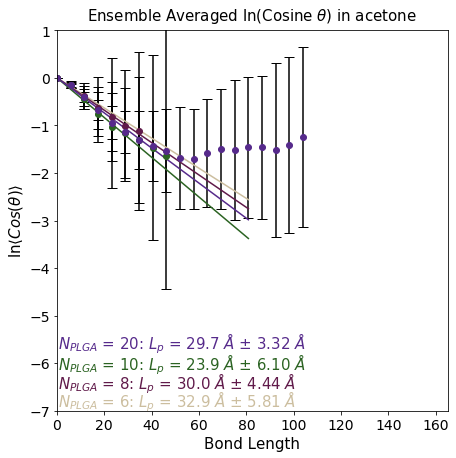

In [156]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ace, np.log(cor_n6plga_ace[0]), yerr=mk_n6p_ace, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8ace, np.log(cor_n8plga_ace[0]), yerr=mk_n8p_ace, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10ace, np.log(cor_n10plga_ace[0]), yerr=mk_n10p_ace, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20ace, np.log(cor_n20plga_ace[0]), yerr=mk_n20p_ace, color='#562A8B', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n20ace[:15], gg_n6plga_n20ace[:15], color='#CCBE9F')
plt.plot(blen_n20ace[:15], gg_n8plga_n20ace[:15], color='#601A4A')
plt.plot(blen_n20ace[:15], gg_n10plga_n20ace[:15], color='#2B6322')
plt.plot(blen_n20ace[:15], gg_n20plga_ace[:15], color='#562A8B')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in acetone', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-7,1)
plt.xlim(0,165)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
#plt.legend([r'$N_{PEG}$ = 6: $L_{p}$ = 10.7 $\AA$ ± 1.62 $\AA$'], loc=3, frameon=0, fontsize=14, prop=font)
plt.tick_params(labelsize=14)
plt.text(0.5, -6.92,r'$N_{PLGA}$ = 6: $L_{p}$ = 32.9 $\AA$ ± 5.81 $\AA$', fontsize=15, color='#CCBE9F')
plt.text(0.5, -6.54,r'$N_{PLGA}$ = 8: $L_{p}$ = 30.0 $\AA$ ± 4.44 $\AA$', fontsize=15, color='#601A4A')
plt.text(0.5, -6.14,r'$N_{PLGA}$ = 10: $L_{p}$ = 24.9 $\AA$ ± 4.93 $\AA$', fontsize=15, color='#2B6322')
plt.text(0.5, -5.70,r'$N_{PLGA}$ = 20: $L_{p}$ = 27.5 $\AA$ ± 3.38 $\AA$', fontsize=15, color='#562A8B')

In [157]:
rgplga_olig_ace[r"$R_{g}$ [Angstrom] N = 20 PLGA in acetone"] = n20_blksplga_ace["Avg Radius of gyration"]
rgplga_olig_ace

,$R_{g}$ [Angstrom] N = 6 PLGA in acetone,$R_{g}$ [Angstrom] N = 8 PLGA in acetone,$R_{g}$ [Angstrom] N = 10 PLGA in acetone,$R_{g}$ [Angstrom] N = 20 PLGA in acetone
0,7.576646,8.907113,9.104742,10.830813
1,6.753936,8.576257,8.127979,12.961543
2,7.838579,8.804313,10.582548,11.097781
3,7.832589,9.653885,9.360085,10.533921
4,7.651865,8.757768,10.127167,15.744390


In [158]:
pers_plgat_ace[r"$L_{p}$ [Angstrom] N = 20 PLGA in acetone"] = n20_blksplga_ace["Avg persistence length"]
pers_plgat_ace

,$L_{p}$ [Angstrom] N = 6 PLGA in acetone,$L_{p}$ [Angstrom] N = 8 PLGA in acetone,$L_{p}$ [Angstrom] N = 10 PLGA in acetone,$L_{p}$ [Angstrom] N = 20 PLGA in acetone
0,36.375316,29.631153,22.968325,27.840359
1,21.461862,27.133883,19.803589,23.288585
2,36.294907,29.235818,30.972716,28.614785
3,36.473693,38.305865,20.112041,24.783605
4,34.108783,25.473421,30.537220,33.021845


### N = 30 PLGA/acetone system

In [159]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n30_plga_ace = mda.Universe("n30plga_ace/n30plgaonly_ace.pdb", "n30plga_ace/noace_n30plga.xtc")

In [160]:
n30_plga_ace.trajectory

<XTCReader n30plga_ace/noace_n30plga.xtc with 18001 frames of 453 atoms>

In [161]:
len(n30_plga_ace.trajectory)

18001

In [162]:
#Select the polymer heavy atoms 
plga_n30ace = n30_plga_ace.select_atoms("resname sPLG PLG tPLG and not type H")

In [163]:
crv_n30plga_ace = pers_length(plga_n30ace,30)
crv_n30plga_ace

array([[ 1.        ,  0.8485284 ,  0.67194548,  0.58296934,  0.54653252,
         0.50797352,  0.48222621,  0.48004078,  0.4897901 ,  0.5283579 ,
         0.57165585,  0.62935457,  0.60250705,  0.56196381,  0.52453665,
         0.50285288,  0.51706227,  0.59056001,  0.58232067,  0.60403445,
         0.67431781,  0.71512328,  0.70560871,  0.75322228,  0.78697989,
         0.75144846,  0.76376037,  0.89600454,  0.84814228],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ,  7.        ,  8.        ,  9.        ,
        10.        , 11.        , 12.        , 13.        , 14.        ,
        15.        , 16.        , 17.        , 18.        , 19.        ,
        20.        , 21.        , 22.        , 23.        , 24.        ,
        25.        , 26.        , 27.        , 28.        ],
       [ 0.        , 31.9480306 , 47.78260395, 54.34033778, 56.87054685,
        59.47105917, 61.16909972, 61.31193424, 60.67321366, 58.10542853,
  

In [164]:
com_bond_n30ace = np.zeros(shape=(1,18000))
count = 0
for ts in n30_plga_ace.trajectory[0:18000]:
    n30_mon1_ace = n30_plga_ace.select_atoms("resid 1")
    n30_mon2_ace = n30_plga_ace.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n30_mon1_ace.center_of_mass(), n30_mon2_ace.center_of_mass(), 
                                                   box=n30_plga_ace.trajectory.ts.dimensions)
    com_bond_n30ace[0, count] = oo_len
    count += 1
    

In [165]:
com_bond

array([[6.09997491, 6.23139581, 6.17588698, ..., 6.11147967, 6.35360308,
        5.97739273]])

In [166]:
np.std(com_bond)

0.754655677316976

In [167]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

5.776390474751167

In [168]:
np.mean(com_bond_n30ace)

5.783623303659128

In [169]:
np.std(com_bond_n30ace)

0.7738126088488616

### Radius of Gyration vs. time N = 30 PLGA/acetone system

In [170]:
n30plga_rgens_ace, cor_n30plga_ace, N30plga_cos_ace, rgace_n30plga = get_rg_pers_poly(plga_n30ace, n30_plga_ace, 0, 18000)

In [171]:
n30plga_rgens_ace[0].shape

(18000,)

In [172]:
cor_n30plga_ace[3]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28.])

In [173]:
N30plga_cos_ace

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.8485284 , 0.85319497, 0.84939881, ..., 0.90714083, 0.90986599,
        0.9046796 ],
       [0.67194548, 0.65826331, 0.64687099, ..., 0.78421084, 0.78507481,
        0.79014933],
       ...,
       [0.76376037, 0.74989428, 0.78189294, ..., 0.7087784 , 0.73574676,
        0.84565032],
       [0.89600454, 0.82837849, 0.92957928, ..., 0.8224511 , 0.79301628,
        0.83857472],
       [0.84814228, 0.70943006, 0.91050102, ..., 0.98892121, 0.93259222,
        0.98981361]])

In [174]:
rgace_n30plga

18.70284388748126

In [175]:
np.std(n30plga_rgens_ace)

4.930344521163678

(0.2, 4)

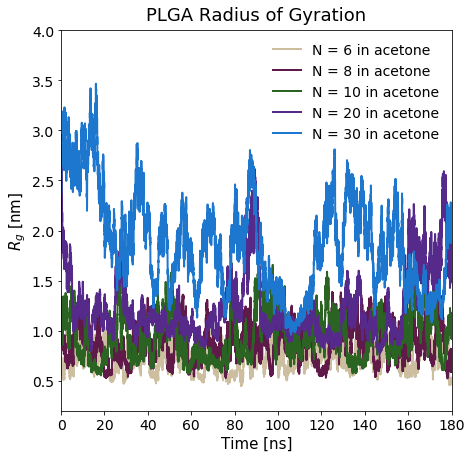

In [218]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6plga_rgens_ace[0]/10,linewidth=2, color='#CCBE9F')
plt.plot(trj_len/100, n8plga_rgens_ace[0]/10,linewidth=2, color='#601A4A')
plt.plot(trj_len/100, n10plga_rgens_ace[0]/10,linewidth=2, color='#2B6322')
plt.plot(trj_len/100, n20plga_rgens_ace[0]/10,linewidth=2, color='#562A8B')
plt.plot(trj_len/100, n30plga_rgens_ace[0]/10,linewidth=2, color='#1D77CF')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone','N = 8 in acetone','N = 10 in acetone','N = 20 in acetone','N = 30 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,4)

In [177]:
np.save('n6plga_aceRg.npy', n6plga_rgens_ace[0])
np.save('n8plga_aceRg.npy', n8plga_rgens_ace[0])
np.save('n10plga_aceRg.npy', n10plga_rgens_ace[0])
np.save('n20plga_aceRg.npy', n20plga_rgens_ace[0])
np.save('n30plga_aceRg.npy', n30plga_rgens_ace[0])

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 30 PLGA/acetone system

In [178]:
# x values
blen_n30ace = cor_n30plga_ace[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_n30ace

array([  0.        ,   5.77639047,  11.55278095,  17.32917142,
        23.1055619 ,  28.88195237,  34.65834285,  40.43473332,
        46.2111238 ,  51.98751427,  57.76390475,  63.54029522,
        69.3166857 ,  75.09307617,  80.86946665,  86.64585712,
        92.4222476 ,  98.19863807, 103.97502855, 109.75141902,
       115.5278095 , 121.30419997, 127.08059044, 132.85698092,
       138.63337139, 144.40976187, 150.18615234, 155.96254282,
       161.73893329])

In [179]:
mk_n30p_ace = cor_n30plga_ace[1]/cor_n30plga_ace[0]
mk_n30p_ace

array([3.79213356e-18, 2.27137657e-02, 7.37727320e-02, 1.44869665e-01,
       2.24785457e-01, 2.84529295e-01, 3.29329882e-01, 3.58602711e-01,
       4.06778549e-01, 4.69626680e-01, 5.52341229e-01, 6.10513537e-01,
       7.05853986e-01, 7.91158341e-01, 8.39671400e-01, 8.98245996e-01,
       1.05434862e+00, 1.23393643e+00, 1.42867175e+00, 1.67769880e+00,
       1.91760324e+00, 2.31419282e+00, 3.02804964e+00, 3.38683417e+00,
       3.25896199e+00, 2.46703924e+00, 2.11127328e+00, 2.31098657e+00,
       3.16018757e+00])

<ErrorbarContainer object of 3 artists>

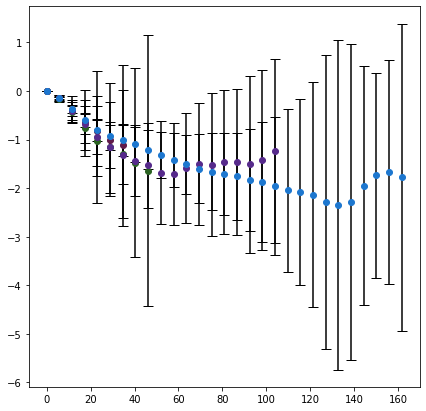

In [180]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ace, np.log(cor_n6plga_ace[0]), yerr=mk_n6p_ace, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8ace, np.log(cor_n8plga_ace[0]), yerr=mk_n8p_ace, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10ace, np.log(cor_n10plga_ace[0]), yerr=mk_n10p_ace, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20ace, np.log(cor_n20plga_ace[0]), yerr=mk_n20p_ace, color='#562A8B', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n30ace, np.log(cor_n30plga_ace[0]), yerr=mk_n30p_ace, color='#1D77CF', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [181]:
# All the points give the best fits for N = 6 peg in water
n30_blksplga_ace , n30plga_lpace = bavg_pers_cnt(5, plga_n30ace, n30_plga_ace, lb_avg_pn6, 4, 3000 , 18000)

3000
6000
Lp [Angstroms]: 32.842411667726054
Error in Lp from fit [Angstroms], 95% CL : 0.19951795851899104
R2 score: 0.9831906937917039
6000
9000
Negative cosine theta values present, doing exponential fit...
Lp [Angstroms], Exp. fit: 31.764539212216782
Error in Lp from fit [Angstroms]: 0.0024439716205730214
9000
12000
Lp [Angstroms]: 26.666439080877314
Error in Lp from fit [Angstroms], 95% CL : 0.19060876212432346
R2 score: 0.9772882356880173
12000
15000
Lp [Angstroms]: 30.388588941599313
Error in Lp from fit [Angstroms], 95% CL : 0.15734825115676787
R2 score: 0.9875466750058476
15000
18000
Negative cosine theta values present, doing exponential fit...
Lp [Angstroms], Exp. fit: 32.98931610261073
Error in Lp from fit [Angstroms]: 0.002862178677834469


In [182]:
n30_blksplga_ace

{'Avg Radius of gyration': array([18.94855601, 18.52735815, 13.95651855, 20.30061609, 15.9261418 ]),
 'Avg persistence length': array([32.84241167, 31.76453921, 26.66643908, 30.38858894, 32.9893161 ])}

In [183]:
n30plga_lpace

array([[ 3.28424117e+01,  3.17645392e+01,  2.66664391e+01,
         3.03885889e+01,  3.29893161e+01],
       [ 1.99517959e-01,  2.44397162e-03,  1.90608762e-01,
         1.57348251e-01,  2.86217868e-03],
       [-3.04484339e-02, -3.14816467e-02, -3.75003200e-02,
        -3.29070890e-02, -3.03128442e-02],
       [ 7.39607532e-04,  0.00000000e+00,  1.55311324e-03,
         6.27565708e-04,  0.00000000e+00]])

In [184]:
n30plga_lpace[2]

array([-0.03044843, -0.03148165, -0.03750032, -0.03290709, -0.03031284])

In [185]:
np.mean(n30plga_lpace[3])

0.000584057295244037

In [186]:
blen_n30ace

array([  0.        ,   5.77639047,  11.55278095,  17.32917142,
        23.1055619 ,  28.88195237,  34.65834285,  40.43473332,
        46.2111238 ,  51.98751427,  57.76390475,  63.54029522,
        69.3166857 ,  75.09307617,  80.86946665,  86.64585712,
        92.4222476 ,  98.19863807, 103.97502855, 109.75141902,
       115.5278095 , 121.30419997, 127.08059044, 132.85698092,
       138.63337139, 144.40976187, 150.18615234, 155.96254282,
       161.73893329])

In [187]:
gg_n30plga_ace = line_fit(np.mean(n30plga_lpace[2]),blen_n30ace)

In [188]:
gg_n6plga_n30ace = line_fit(np.mean(n6plga_lpace[2]),blen_n30ace)

In [189]:
gg_n8plga_n30ace = line_fit(np.mean(n8plga_lpace[2]),blen_n30ace)

In [190]:
gg_n10plga_n30ace = line_fit(np.mean(n10plga_lpace[2]),blen_n30ace)

In [191]:
gg_n20plga_n30ace = line_fit(np.mean(n20plga_lpace[2]),blen_n30ace)

In [192]:
gg_n30plga_ace

array([-0.        , -0.18790637, -0.37581274, -0.5637191 , -0.75162547,
       -0.93953184, -1.12743821, -1.31534457, -1.50325094, -1.69115731,
       -1.87906368, -2.06697005, -2.25487641, -2.44278278, -2.63068915,
       -2.81859552, -3.00650188, -3.19440825, -3.38231462, -3.57022099,
       -3.75812736, -3.94603372, -4.13394009, -4.32184646, -4.50975283,
       -4.69765919, -4.88556556, -5.07347193, -5.2613783 ])

### Block averaged Radius of gyration and persistence length, N = 30 PLGA/acetone system

In [195]:
np.mean(n30_blksplga_ace["Avg persistence length"])

30.93025900100604

In [196]:
np.std(n30_blksplga_ace["Avg persistence length"])

2.3266127397517287

In [197]:
np.mean(n30_blksplga_ace["Avg Radius of gyration"])

17.53183812121009

In [198]:
np.std(n30_blksplga_ace["Avg Radius of gyration"])

2.2814667150815806

Text(0.5, -5.3, '$N_{PLGA}$ = 30: $L_{p}$ = 30.9 $\\AA$ ± 2.33 $\\AA$')

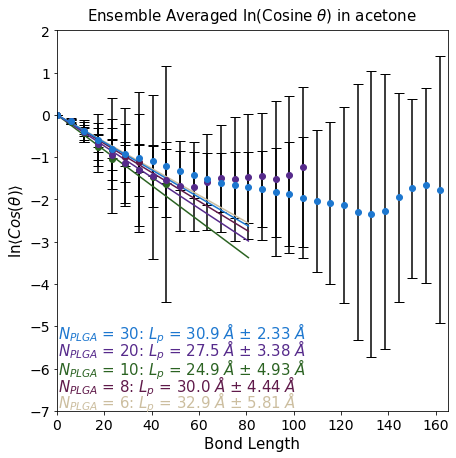

In [224]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ace, np.log(cor_n6plga_ace[0]), yerr=mk_n6p_ace, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8ace, np.log(cor_n8plga_ace[0]), yerr=mk_n8p_ace, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10ace, np.log(cor_n10plga_ace[0]), yerr=mk_n10p_ace, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20ace, np.log(cor_n20plga_ace[0]), yerr=mk_n20p_ace, color='#562A8B', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n30ace, np.log(cor_n30plga_ace[0]), yerr=mk_n30p_ace, color='#1D77CF', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n30ace[:15], gg_n6plga_n30ace[:15], color='#CCBE9F')
plt.plot(blen_n30ace[:15], gg_n8plga_n30ace[:15], color='#601A4A')
plt.plot(blen_n30ace[:15], gg_n10plga_n30ace[:15], color='#2B6322')
plt.plot(blen_n30ace[:15], gg_n20plga_n30ace[:15], color='#562A8B')
plt.plot(blen_n30ace[:15], gg_n30plga_ace[:15], color='#1D77CF')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in acetone', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-7,2)
plt.xlim(0,165)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
#plt.legend([r'$N_{PEG}$ = 6: $L_{p}$ = 10.7 $\AA$ ± 1.62 $\AA$'], loc=3, frameon=0, fontsize=14, prop=font)
plt.tick_params(labelsize=14)
plt.text(0.5, -6.92,r'$N_{PLGA}$ = 6: $L_{p}$ = 32.9 $\AA$ ± 5.81 $\AA$', fontsize=15, color='#CCBE9F')
plt.text(0.5, -6.54,r'$N_{PLGA}$ = 8: $L_{p}$ = 30.0 $\AA$ ± 4.44 $\AA$', fontsize=15, color='#601A4A')
plt.text(0.5, -6.14,r'$N_{PLGA}$ = 10: $L_{p}$ = 24.9 $\AA$ ± 4.93 $\AA$', fontsize=15, color='#2B6322')
plt.text(0.5, -5.70,r'$N_{PLGA}$ = 20: $L_{p}$ = 27.5 $\AA$ ± 3.38 $\AA$', fontsize=15, color='#562A8B')
plt.text(0.5, -5.30,r'$N_{PLGA}$ = 30: $L_{p}$ = 30.9 $\AA$ ± 2.33 $\AA$', fontsize=15, color='#1D77CF')

In [200]:
rgplga_olig_ace[r"$R_{g}$ [Angstrom] N = 30 PLGA in acetone"] = n30_blksplga_ace["Avg Radius of gyration"]
rgplga_olig_ace

,$R_{g}$ [Angstrom] N = 6 PLGA in acetone,$R_{g}$ [Angstrom] N = 8 PLGA in acetone,$R_{g}$ [Angstrom] N = 10 PLGA in acetone,$R_{g}$ [Angstrom] N = 20 PLGA in acetone,$R_{g}$ [Angstrom] N = 30 PLGA in acetone
0,7.576646,8.907113,9.104742,10.830813,18.948556
1,6.753936,8.576257,8.127979,12.961543,18.527358
2,7.838579,8.804313,10.582548,11.097781,13.956519
3,7.832589,9.653885,9.360085,10.533921,20.300616
4,7.651865,8.757768,10.127167,15.744390,15.926142


In [201]:
pers_plgat_ace[r"$L_{p}$ [Angstrom] N = 30 PLGA in acetone"] = n30_blksplga_ace["Avg persistence length"]
pers_plgat_ace

,$L_{p}$ [Angstrom] N = 6 PLGA in acetone,$L_{p}$ [Angstrom] N = 8 PLGA in acetone,$L_{p}$ [Angstrom] N = 10 PLGA in acetone,$L_{p}$ [Angstrom] N = 20 PLGA in acetone,$L_{p}$ [Angstrom] N = 30 PLGA in acetone
0,36.375316,29.631153,22.968325,27.840359,32.842412
1,21.461862,27.133883,19.803589,23.288585,31.764539
2,36.294907,29.235818,30.972716,28.614785,26.666439
3,36.473693,38.305865,20.112041,24.783605,30.388589
4,34.108783,25.473421,30.537220,33.021845,32.989316


In [222]:
rgplga_olig_ace.to_pickle("PLGA_ace_Rg.pkl")

In [223]:
pers_plgat_ace.to_pickle("PLGA_ace_Lp.pkl")

### Fluory Exponent, PLGA/acetone system

In [202]:
n_plga = np.array([6,8,10,20,30])
rg_nplga_ace = np.array([np.mean(n6_blksplga_ace["Avg Radius of gyration"])
                    ,np.mean(n8_blksplga_ace["Avg Radius of gyration"]),np.mean(n10_blksplga_ace["Avg Radius of gyration"])
                    ,np.mean(n20_blksplga_ace["Avg Radius of gyration"]),np.mean(n30_blksplga_ace["Avg Radius of gyration"])])

In [203]:
rg_nplga_ace

array([ 7.530723  ,  8.93986737,  9.46050424, 12.23368969, 17.53183812])

In [204]:
rgace_nplga_std = np.array([np.std(np.log10(n6_blksplga_ace["Avg Radius of gyration"]))
                    ,np.std(np.log10(n8_blksplga_ace["Avg Radius of gyration"]))
                        ,np.std(np.log10(n10_blksplga_ace["Avg Radius of gyration"]))
                    ,np.std(np.log10(n20_blksplga_ace["Avg Radius of gyration"]))
                        ,np.std(np.log10(n30_blksplga_ace["Avg Radius of gyration"]))])
rgace_nplga_std

array([0.02401001, 0.01768961, 0.0396824 , 0.06529144, 0.05872998])

In [205]:
n_plga

array([ 6,  8, 10, 20, 30])

In [206]:
np.log10(rg_nplga_ace)

array([0.87683667, 0.95133108, 0.97591428, 1.08755746, 1.24382745])

In [207]:
np.log10(n_plga)

array([0.77815125, 0.90308999, 1.        , 1.30103   , 1.47712125])

In [208]:
# From fitting all points, I get best fit 
from sklearn.linear_model import LinearRegression
model_vpace = LinearRegression(fit_intercept=True)
model_vpace.fit(np.log10(n_plga).reshape(-1,1), np.log10(rg_nplga_ace))
# Slope here is in nanometers
print("Model slope:    ", model_vpace.coef_[0])
print("Model intercept:", model_vpace.intercept_)

Model slope:     0.48492332024858237
Model intercept: 0.4976160428390297


In [209]:
gg_ace = model_vpace.predict(np.log10(n_plga.reshape(-1,1)))
gg_ace

array([0.87495973, 0.93554544, 0.98253936, 1.12851583, 1.21390659])

In [210]:
print("Mean Std Error:", sklearn.metrics.mean_squared_error(np.log10(rg_nplga_ace), gg_ace))
print("R2 score:", sklearn.metrics.r2_score(np.log10(rg_nplga_ace), gg_ace))

Mean Std Error: 0.0005738894120429104
R2 score: 0.9648204922808041


In [211]:
# Residuals between the true y data and model y data 
resid_vace = np.log10(rg_nplga_ace) - gg_ace
resid_vace

array([ 0.00187694,  0.01578564, -0.00662508, -0.04095837,  0.02992087])

In [212]:
# How to calculate Sum((Xi - avg(X))^2): X values are the bond length values 
nt_ttace = np.log10(n_plga)
nt_ttace -= np.mean(nt_ttace)
nhui_ace = nt_ttace**2
np.sum(nhui_ace)

0.334663876760361

In [213]:
# t-value with 95 % confidence intervals 
scipy.stats.t.ppf(0.975, 4)

2.7764451051977987

In [214]:
# How to calculate 95% confidence interval for the slope 
flc_vace = scipy.stats.t.ppf(0.975, 4)*np.sqrt((np.sum(resid_vace**2)/len(resid_vace))/(np.sum(nhui_ace)))
flc_vace

0.11497377168997712

Text(1.1, 0.95, '$v_{acetone}$ = 0.48 ± 0.11')

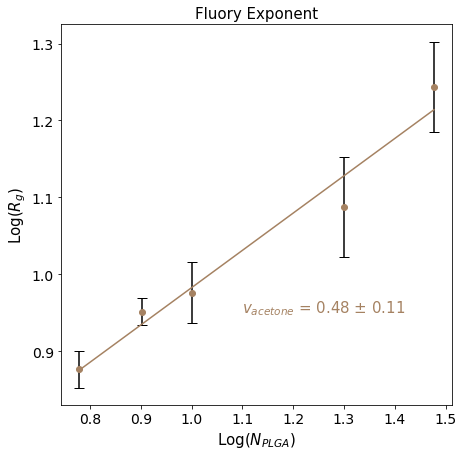

In [221]:
plt.figure(figsize=(7,7))
plt.errorbar(np.log10(n_plga), np.log10(rg_nplga_ace), yerr=rgace_nplga_std, color='#A58262', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(np.log10(n_plga), gg_ace, color='#A58262')
plt.title(r'Fluory Exponent', fontsize=15)
plt.xlabel(r'Log($N_{PLGA}$)', fontsize=15)
plt.ylabel(r'Log($R_{g}$)', fontsize=15)
plt.tick_params(labelsize=14)
plt.text(1.1, 0.95, r'$v_{acetone}$ = 0.48 ± 0.11', fontsize=15, color='#A58262')